# 5.1 Частные производные

In [20]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b

print(diff(f, a))

8*a**7 + 5*b - cos(c)


In [21]:
a, b, x = symbols('a b x', real=True)
f = 2*a*x + b**2

print(diff(f, a))

print(diff(f, a, 2))

2*x
0


In [22]:
a, b = symbols('a, b', real = True)
f = (5 - a - 2*b)**2

print(diff(f,a))
print(diff(f,b))

2*a + 4*b - 10
4*a + 8*b - 20


# 5.2 Безусловные экстремумы

In [23]:
# назодим стационарные точки

from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])
print(sol)

[(-2, -1), (-1, -2), (1, 2), (2, 1)]


Затем находим вторые производные и для них составляем матрице Hesse и опредялем точки минимум,максимум и седловые

In [24]:
x, y  = symbols('x, y')
eq1 = Eq(3*x**2 -3*y, 0)
eq2 = Eq(3*y**2 -3*x, 0)

sol =solve([eq1, eq2], [x, y])
print(sol)

[(0, 0), (1, 1), ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2), ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]


# 5.4 Задача оптимизации

Чтобы реализовать метод оптимизации, нужна функция, для которой его будут применять. Мы возьмём самую известную функцию, используемую для таких целей — функцию Розенброка. Данную функцию можно представить так:

>Функция Розенброка, или, как её ещё называют, функция банана или функция долины, является популярной тестовой задачей для алгоритмов оптимизации на основе градиента. Вы встретитесь с ней ещё не раз, так как её часто используют в качестве эталонного теста для оценки методов оптимизации. Интересно, что придумана она была в 1960 году, то есть уже более 60 лет её используют подобным образом. Мы берём именно эту функцию, потому что она оптимальна для проверки качества алгоритмов.



In [25]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

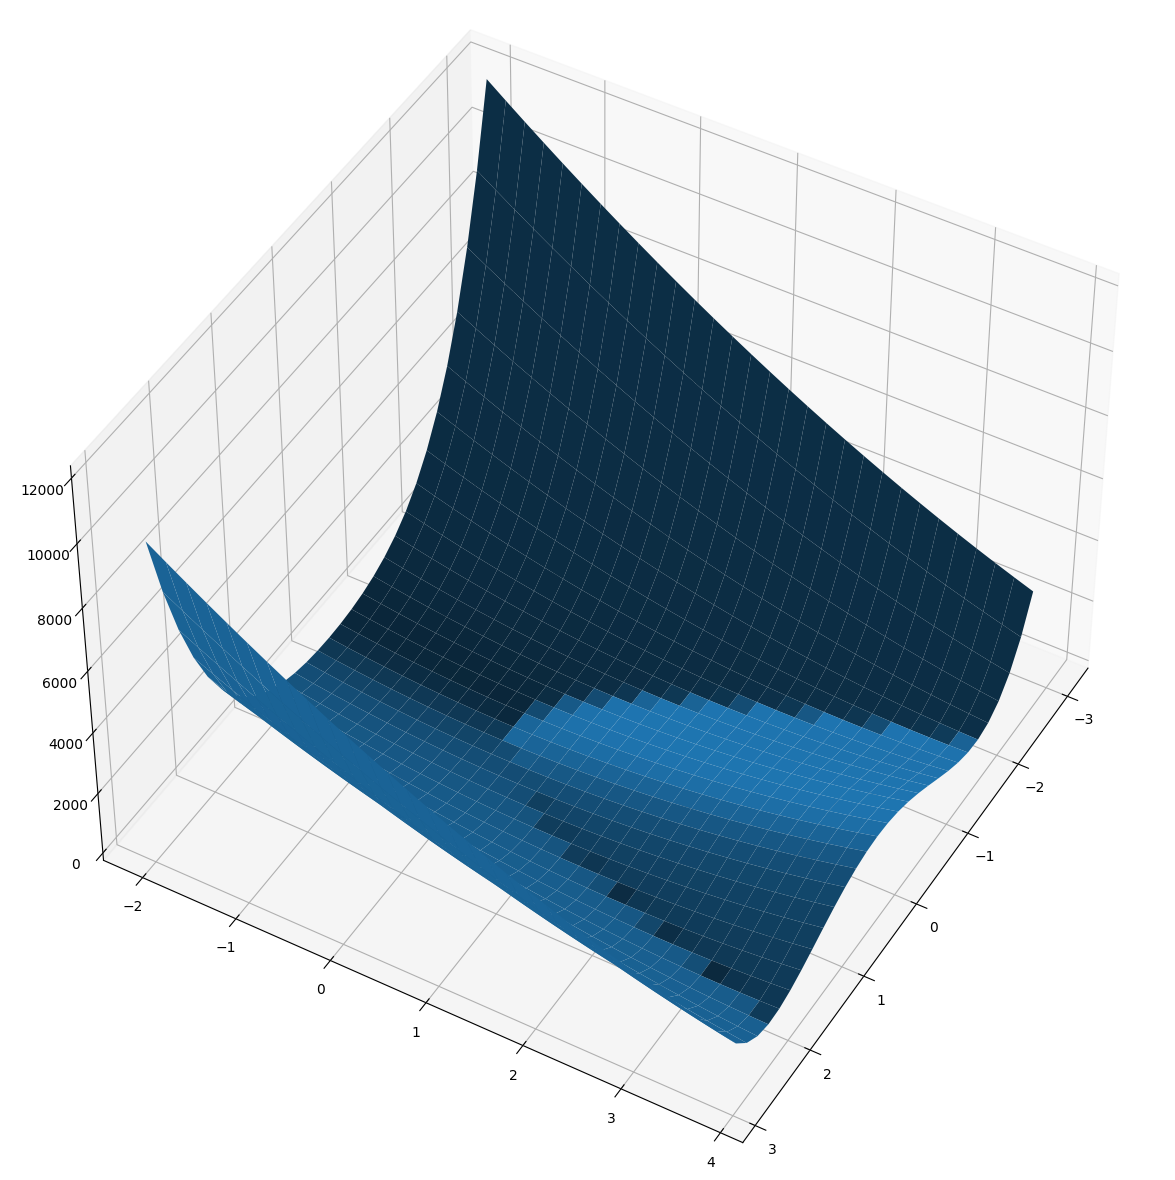

In [26]:
# Изобразим 3д график данной функции
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, необходимо установить method = 'powell' в функции minim.

In [27]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


Допустим, у нас есть некоторая точка $x_0$ в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом):

In [28]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [29]:
# Task 4.5
import numpy as np
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r
 
 
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
res =  least_squares(func_rosen, x1)
print(res.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


# 5.5 Условные экстремумы. Метод Лагранжа

In [30]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [31]:
# Task 5.3
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
print(sols)

[(1.00000000000000, 0.0, 0.707106781186548)]


In [32]:
# Taks 5.4
from sympy import *
x,y,z,w  = symbols(' x y z w ')
g = 2*(x*y + x*z + y*z)

L = 2*(x*y + x*z + y*z) + w*(x*y*z -1)
L_x = L.diff(x)
L_y = L.diff(y)
L_w = L.diff(w)
L_z = L.diff(z)

print(solve([L_x, L_y, L_w, L_z], x, y, z, w)[0])

(1, 1, 1, -4)


Мы разобрали задачи, в которых ограничения выглядели, как равенства. Но бывают и исключительные случаи, в которых ограничения заданы в виде неравенств. Что делать в такой ситуации?

>Ограничения в виде неравенства можно свести к ограничениям равенства с помощью дополнительной переменной x.

In [33]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


# 5.6 Градиент и антиградиент

Для работы с градиентом импортируем хорошо известную нам библиотеку NumPy:

In [34]:
import numpy as np

In [35]:
# Зададим массив, для которого хотим найти градиент, и вычислим его:
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)

np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [36]:
# Если специально не определять аргумент varargs, 
# то его значение равно 1, так что на границах вектора 
# мы получаем обычную разность для соседних элементов массива:

print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


In [37]:
# А вот внутри вектора для каждого элемента мы считаем 
# разность его соседних значений, но уже поделённую на 2, 
# то есть, по сути, среднее арифметическое для значений:

print((f[2] - f[0])/2) # 5.5
print((f[3] - f[1])/2) # 8.0
print((f[4] - f[2])/2) # 11.0
print((f[5] - f[3])/2) # 12.0

5.5
8.0
11.0
12.0


In [38]:
# Шаг можно варьировать. При его изменении вычисления реализуются так же,
# но деление происходит на величину обычного шага у края и удвоенную
# величину шага для элементов внутри вектора:

np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

2.75
4.0
5.5
6.0


In [39]:
# task 6.7
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

# 5.7 Градиентный спуск

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Определим простейшую выпуклую функцию
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [48]:
# Определим функцию для нахождения градиента
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2* b * y])

In [65]:
# Также запрограммируем простейший вариант для градиентного спуска:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [69]:
# Напишем функцию которая будет строить график
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

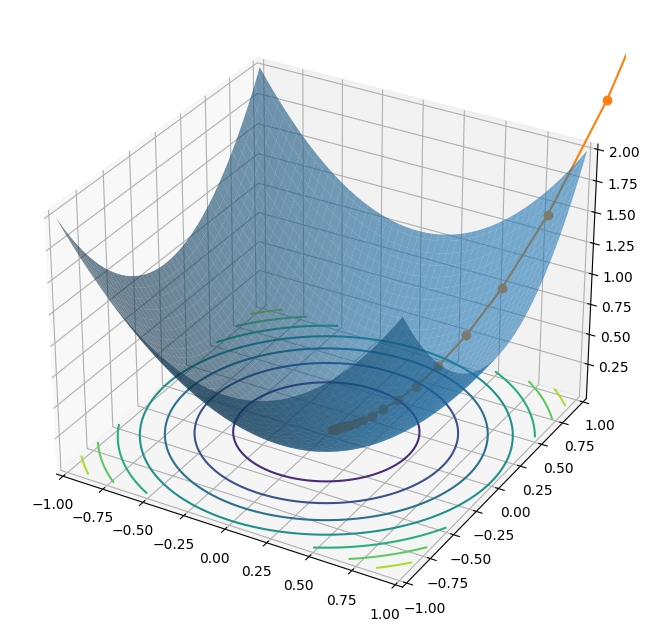

In [74]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)